<hr>
<b><font color='red'>Ejercicio 01</font></b>  

Tomamos la siguiente distribución de puntos:

In [1]:
import sklearn
from sklearn import cluster
from matplotlib import pyplot as plt
from sklearn import datasets
import random
import math
import numpy as np
from PIL import Image

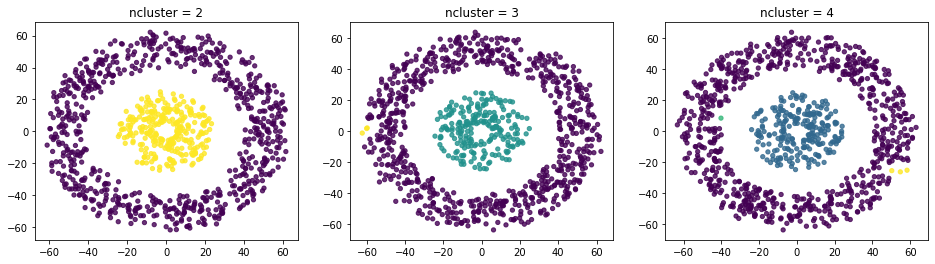

In [4]:
def load2_points(N):
    P = np.zeros([N,2])
    for j in range(N):  
        a=2*math.pi*random.random()
        R=random.choice([40,42,44,5])
        R=R+20*random.random()
        P[j,0]=(R*math.sin(a))
        P[j,1]=(R*math.cos(a))
    return P

fig, ((ax1,ax2,ax3)) = plt.subplots(1,3,figsize = (16, 4))
N=1000
for ax , icluster in zip([ax1,ax2,ax3],[2,3,4]):
    P=load2_points(N)
    #kmeans = KMeans(n_clusters=icluster, linkage='single')
    kmeans = sklearn.cluster.AgglomerativeClustering(n_clusters=icluster, linkage='single')
    y_pred = kmeans.fit_predict(P)
    ax.set_title("ncluster = "+str(icluster))
    ax.scatter(P[:, 0], P[:, 1],s=18, alpha=0.8, c=y_pred)

#plt.savefig("cluster.png")
plt.show()


Agrupalos para que te queden los siguinetes clusteres con (2,3,4). Ayuda utiliza (linkage='single')
<img src="cluster.png" ALIGN="left">

<hr>
<b><font color='red'>Ejercicio 02</font></b>  

Busca una cuadro de algún pintor famoso y utiliza KMeans n_clusters=8 para comprimirlo.

Text(0.5, 1.0, 'image_compressed')

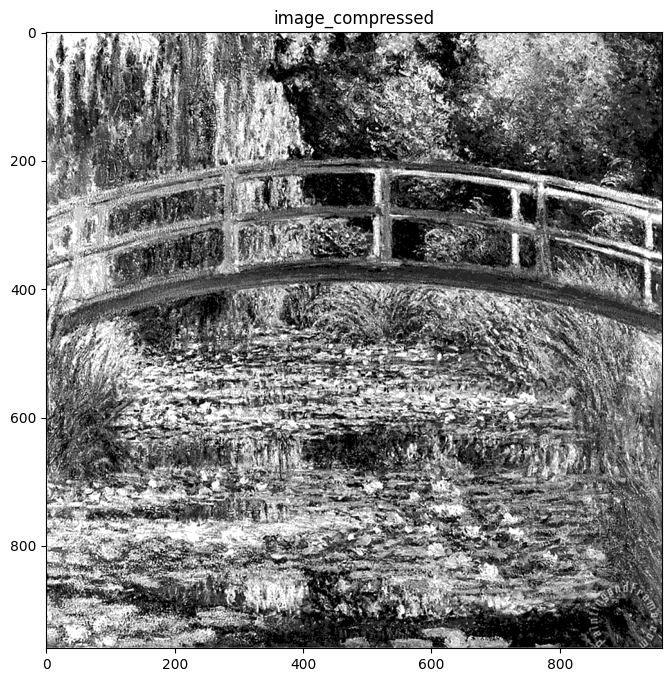

In [25]:
image=Image.open('WaterLilly_Pond.jpg')
gray_image=image.convert('L') #convertimos la imagen a escala de grises
gray_image_array=np.asarray(gray_image) #pasamos la imagen a un np.array
X = gray_image_array.reshape((-1, 1)) 

k_means = cluster.KMeans(n_clusters=8, n_init=4)
k_means.fit(X)
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_
image_compressed = np.choose(labels, values)
image_compressed.shape = gray_image_array.shape

fig, (ax1) = plt.subplots(1,1,figsize = (20, 8))
ax1.imshow(image_compressed, cmap=plt.cm.gray, vmin=image_compressed.min(), vmax=image_compressed.max())
ax1.set_title("image_compressed")